In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
# Cek data awal
print(df.head())
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Fitur yang akan digunakan (drop 'Class' karena kita deteksi tanpa label)
X = df.drop(columns=['Class', 'Time'])

In [5]:
# Scaling (karena nilai Amount sangat berbeda skalanya)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Model Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
df['anomaly'] = model.fit_predict(X_scaled)

In [7]:
# Mapping hasil prediksi
# -1 = Anomali, 1 = Normal
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # ubah 1=normal, -1=anomali → 0=normal, 1=anomali

In [14]:
# Analisis Hasil
print(f"Total transaksi: {len(df)}")
print(f"Jumlah transaksi anomali terdeteksi: {df['anomaly'].sum()}")
print(f"Jumlah transaksi normal: {len(df[df['anomaly'] == 0])}")

Total transaksi: 53571
Jumlah transaksi anomali terdeteksi: 53
Jumlah transaksi normal: 53518


In [15]:
# Tampilkan contoh anomali
print("\nContoh transaksi anomali:")
print(df[df['anomaly'] == 1][['Amount', 'anomaly']].head())


Contoh transaksi anomali:
        Amount  anomaly
1632   7712.43        1
6812    845.73        1
10630   766.36        1
10690  1218.89        1
10891   188.78        1


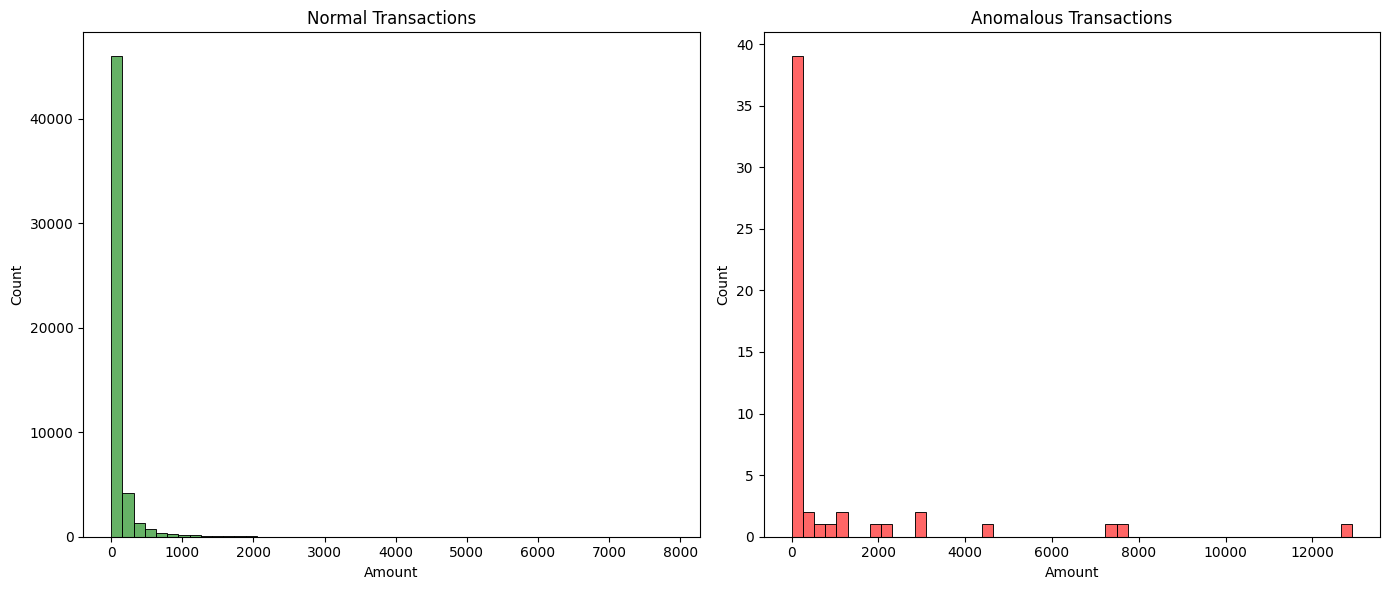

In [17]:
# Visualisasi Distribusi Amount
plt.figure(figsize=(14, 6))

# Subplot 1: Normal Transactions
plt.subplot(1, 2, 1)
sns.histplot(df[df['anomaly'] == 0]['Amount'], bins=50, color='green', alpha=0.6)
plt.title('Normal Transactions')
plt.xlabel('Amount')

# Subplot 2: Anomalous Transactions
plt.subplot(1, 2, 2)
sns.histplot(df[df['anomaly'] == 1]['Amount'], bins=50, color='red', alpha=0.6)
plt.title('Anomalous Transactions')
plt.xlabel('Amount')

plt.tight_layout()
plt.show()

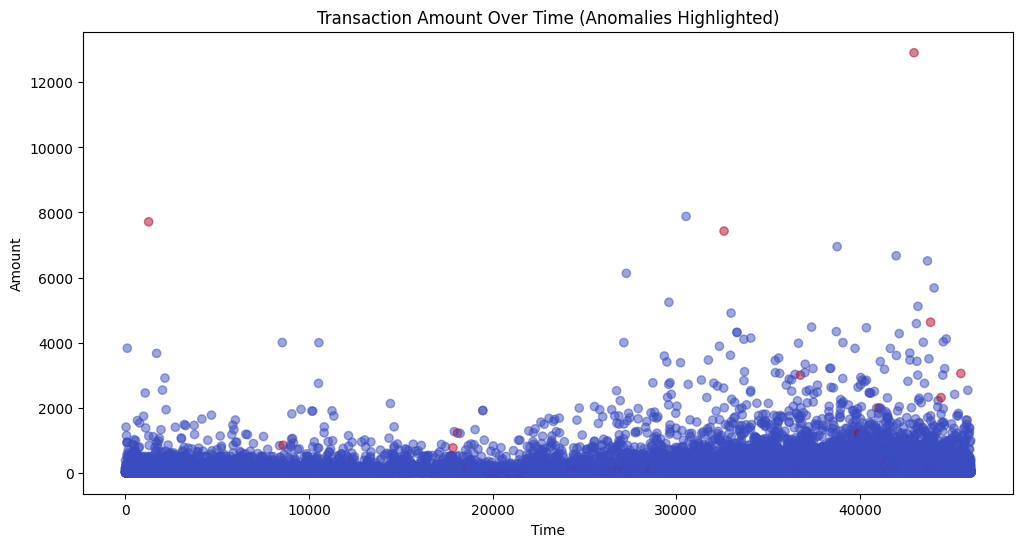

In [18]:
# Visualisasi Scatter Plot Time vs Amount
plt.figure(figsize=(12, 6))
plt.scatter(df['Time'], df['Amount'], c=df['anomaly'], cmap='coolwarm', alpha=0.5)
plt.title('Transaction Amount Over Time (Anomalies Highlighted)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [8]:
# Tampilkan jumlah anomali
print(f"Jumlah transaksi anomali terdeteksi: {df['anomaly'].sum()}")

Jumlah transaksi anomali terdeteksi: 53


In [12]:
print("Jumlah normal:", len(df[df['anomaly'] == 0]))
print("Jumlah anomali:", len(df[df['anomaly'] == 1]))

Jumlah normal: 53518
Jumlah anomali: 53


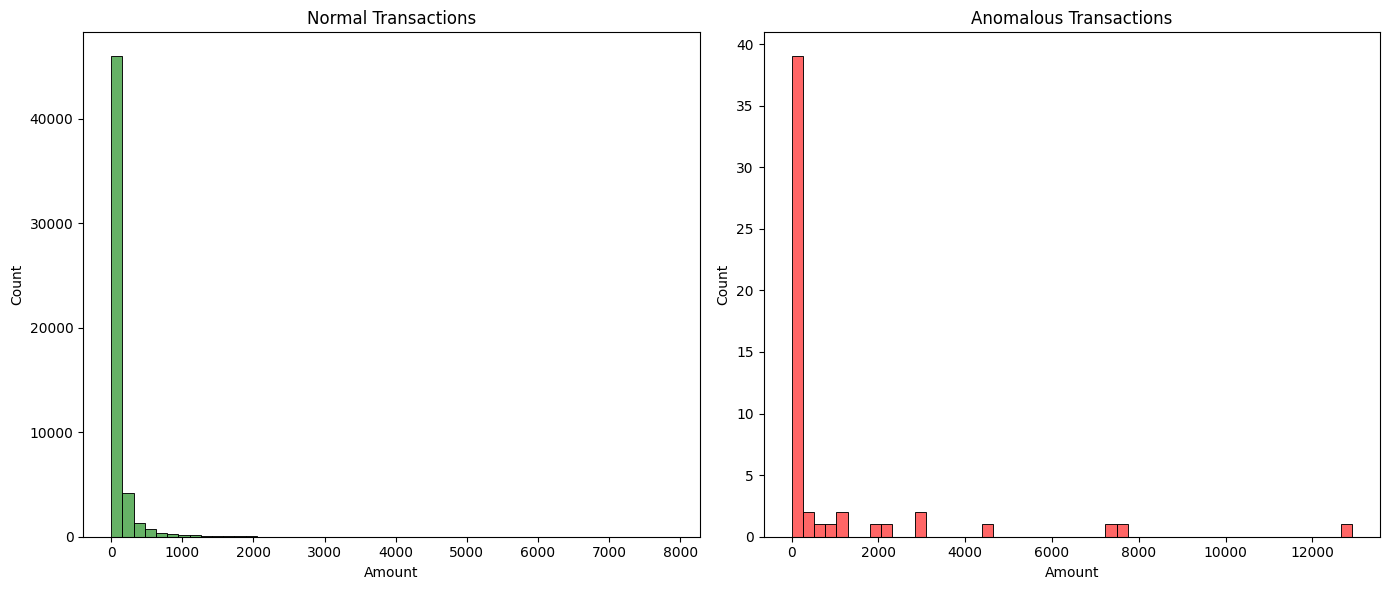

In [13]:
plt.figure(figsize=(14, 6))

# Subplot untuk Normal
plt.subplot(1, 2, 1)
sns.histplot(df[df['anomaly'] == 0]['Amount'], bins=50, color='green', alpha=0.6)
plt.title('Normal Transactions')
plt.xlabel('Amount')

# Subplot untuk Anomali
plt.subplot(1, 2, 2)
sns.histplot(df[df['anomaly'] == 1]['Amount'], bins=50, color='red', alpha=0.6)
plt.title('Anomalous Transactions')
plt.xlabel('Amount')

plt.tight_layout()
plt.show()